# Goal
* Explore using stumpy
    * Similarity between different time series 'sub series' in a long time series
    * Found stumpy while listening to Data Skeptic
        * https://dataskeptic.com/blog/episodes/2022/matrix-profiles-in-stumpy
* Explore some apis
    * Stocks
        * https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984
    * Temperature
        * Tutorial on getting data https://towardsdatascience.com/obtain-historical-weather-forecast-data-in-csv-format-using-python-5a6c090fc828
        * basically using this lib . https://github.com/ekapope/WorldWeatherOnline


In [1]:
import yfinance as yf
import stumpy 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from  matplotlib.patches import Rectangle

In [2]:
cat = yf.Ticker("CAT")

In [3]:
cat.info

{'zip': '60015',
 'sector': 'Industrials',
 'longBusinessSummary': "Caterpillar Inc. manufactures and sells construction and mining equipment, diesel and natural gas engines, industrial gas turbines, and diesel-electric locomotives worldwide. Its Construction Industries segment offers asphalt pavers, compactors, cold planers, motorgraders, pipelayers, road reclaimers, telehandlers, and utility vehicles; backhoe, compact track, multi-terrain, skid steer, and track-type loaders; forestry and wheel excavators; and site prep and track-type tractors. The company's Resource Industries segment provides electric rope and hydraulic shovels, draglines, rotary drills, hard rock vehicles, track-type tractors, mining trucks, longwall miners, wheel loaders, off-highway and articulated trucks, wheel tractor scrapers, wheel dozers, landfill and soil compactors, machinery components, autonomous ready vehicles and solutions, and select work tools. Its Energy & Transportation segment offers reciprocating

In [4]:
x = cat.history(start = '2020-1-1', end = '2022-2-2')

In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
x.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [12]:
x.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2020-01-02,140.998756,142.465524,140.033525,142.446594,3311900,0.0,0,2020-01-02
2020-01-03,140.781138,141.907238,139.532014,140.468857,3100600,0.0,0,2020-01-03
2020-01-06,139.361673,140.582394,138.670863,140.374207,2549600,0.0,0,2020-01-06
2020-01-07,139.437352,139.645539,137.696149,138.519440,2841900,0.0,0,2020-01-07
2020-01-08,138.945287,140.591855,138.595161,139.749634,2153200,0.0,0,2020-01-08


In [10]:
x['date'] = x.index

<AxesSubplot:xlabel='date', ylabel='Open'>

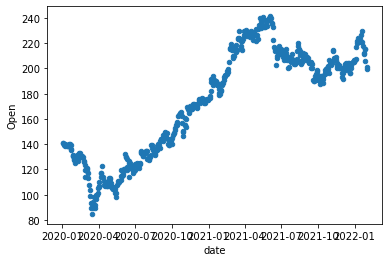

In [11]:

x.plot.scatter(x = 'date', y = 'Open')

# Stumpy

In [14]:
m = 20
mp = stumpy.stump(x['Open'], m)

In [16]:
mp.shape

(507, 4)

In [17]:
type(mp)

numpy.ndarray

In [22]:
mp = mp.astype(np.float32)

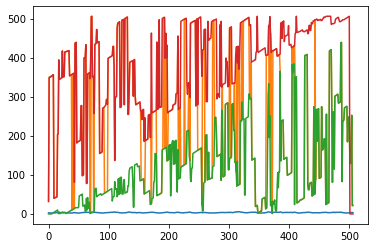

In [24]:
# plt.imshow(mp)
for i in range(mp.shape[1]):
    plt.plot(mp[:,i])

In [25]:
motif_idx = np.argsort(mp[:, 0])[0]
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 50.0


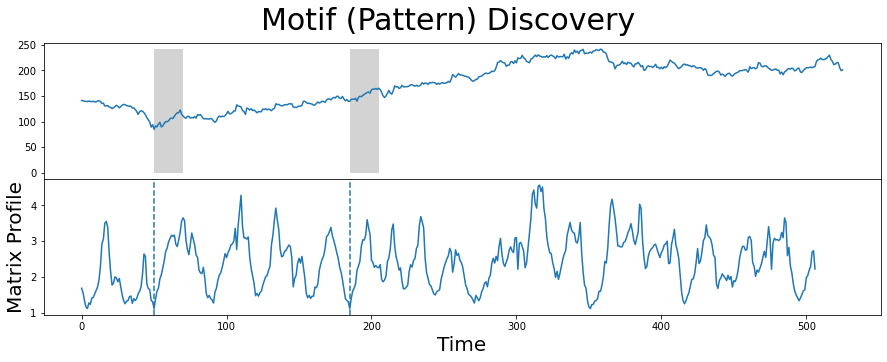

In [26]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(x['Open'].values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = x['Open'].max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()



185 50.0


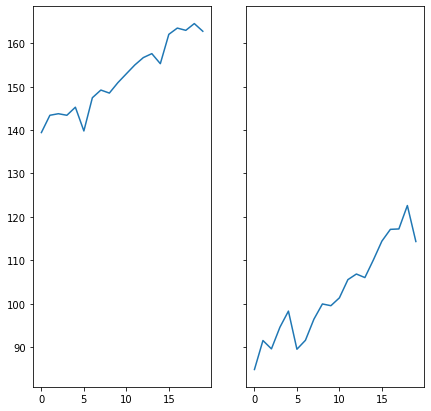

In [30]:
fig, ax = plt.subplots(1,2, figsize = (7,7), sharey=True)

values = x['Open'].to_numpy()
print(motif_idx,nearest_neighbor_idx )
nearest_neighbor_idx = nearest_neighbor_idx.astype(np.int32)
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

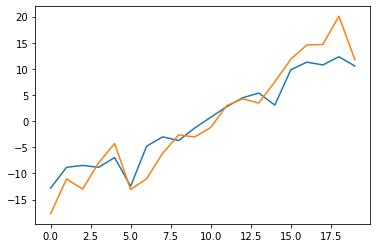

In [31]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')

In [32]:
from wwo_hist import retrieve_hist_data
import os

In [34]:
def get_api_key():
    with open("apikey.txt", 'r') as f:
        return f.readline().strip('\n')

In [35]:
api_key = get_api_key()

In [37]:
freq = 24 # once a day
start_date = "1-1-2018"
end_date = "2-2-2022"
location_list = ["albuquerque"]
hist_weather_data = retrieve_hist_data(api_key=api_key, 
                                      location_list=location_list, 
                                      start_date=start_date, 
                                      end_date=end_date, 
                                      frequency=freq, 
                                      location_label=False, 
                                      export_csv=True, 
                                      store_df=True)



Retrieving weather data for albuquerque


Currently retrieving data for albuquerque: from 2018-01-01 to 2018-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.131687
Currently retrieving data for albuquerque: from 2018-02-01 to 2018-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.034009
Currently retrieving data for albuquerque: from 2018-03-01 to 2018-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.958570
Currently retrieving data for albuquerque: from 2018-04-01 to 2018-04-30
Time elapsed (hh:mm:ss.ms) 0:00:03.855208
Currently retrieving data for albuquerque: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:04.932705
Currently retrieving data for albuquerque: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:05.989033
Currently retrieving data for albuquerque: from 2018-07-01 to 2018-07-31
Time elapsed (hh:mm:ss.ms) 0:00:06.908310
Currently retrieving data for albuquerque: from 2018-08-01 to 2018-08-31
Time elapsed (hh:mm:ss.ms) 0:00:07.796645
Currently retrieving data for albuqu

In [38]:
abq = pd.read_csv("albuquerque.csv")

In [39]:
abq.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2018-01-01,9,-3,0.0,8.7,2,94,05:05 PM,06:35 AM,07:15 AM,...,15,20,36,0.0,1024,9,10,149,8,albuquerque
1,2018-01-02,11,1,0.0,8.7,3,100,06:11 PM,07:38 AM,07:15 AM,...,15,1,35,0.0,1023,11,10,298,10,albuquerque
2,2018-01-03,10,-1,0.0,8.7,2,92,07:20 PM,08:35 AM,07:15 AM,...,10,36,32,0.0,1025,10,10,203,6,albuquerque
3,2018-01-04,11,0,0.0,8.7,3,85,08:28 PM,09:25 AM,07:15 AM,...,7,6,22,0.0,1021,11,10,224,3,albuquerque
4,2018-01-05,11,1,0.0,7.0,2,78,09:36 PM,10:08 AM,07:16 AM,...,8,19,26,0.0,1023,11,10,292,4,albuquerque


In [40]:
abq.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

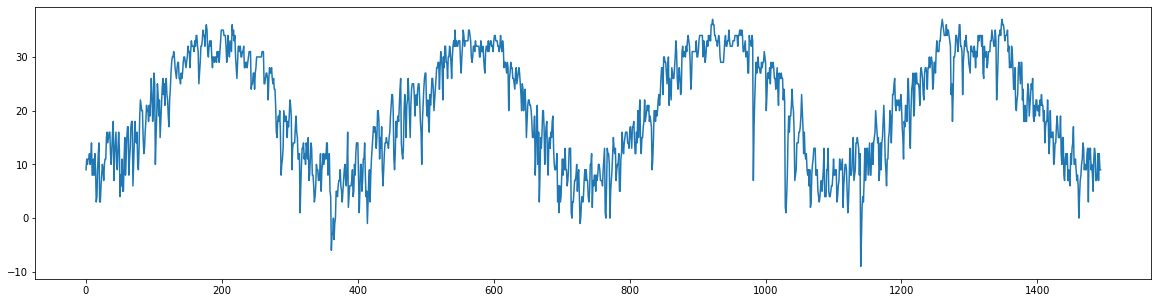

In [41]:
plt.figure(figsize = (20,5))
values = abq['maxtempC'].values.astype(np.float)
plt.plot(values)

In [62]:
m = 60
mp = stumpy.stump(values, m)

In [63]:
motif_idx = np.argsort(mp[:, 0])[0]
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 1389


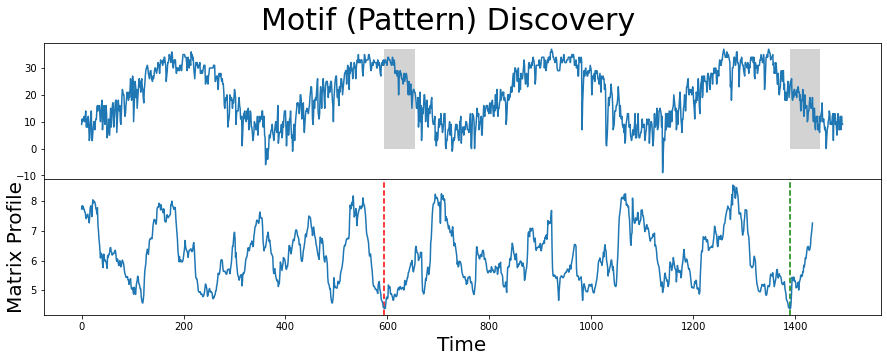

In [64]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = values.max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed", color = 'red')
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color = 'green')
axs[1].plot(mp[:, 0])
plt.show()



594 1389


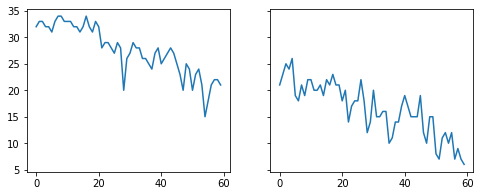

In [65]:
fig, ax = plt.subplots(1,2, figsize = (8,3), sharey=True)

# values = values
print(motif_idx,nearest_neighbor_idx )
nearest_neighbor_idx = nearest_neighbor_idx # .astype(np.int32)
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

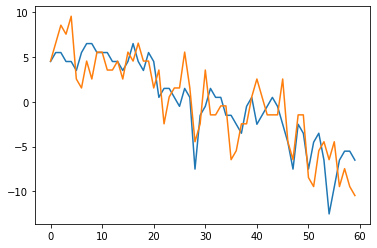

In [66]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')